<a href="https://colab.research.google.com/github/ronit-007/ml_projects/blob/main/Human_Action_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Human_Action_Detection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Downloading the Dataset

The images we are working with are from kaggle dataset.-[Human_detection](https://www.kaggle.com/datasets/emirhanai/human-action-detection-artificial-intelligence)

It is a multiclass datasets with about 18000 images with 15 different classes.


In [ ]:
# # Unzip the file
# import zipfile
# zip_ref = zipfile.ZipFile("/content/archive (4).zip")
# zip_ref.extractall("/content/drive/MyDrive")
# zip_ref.close()

In [ ]:
# Unzip the sample dataset with less data
# import zipfile
# zip_ref = zipfile.ZipFile("/content/sample_dataset.zip")
# zip_ref.extractall("/content/drive/MyDrive/emirhan_human_dataset")
# zip_ref.close()

In [ ]:
# Checking out the directory
from helper_function import walk_through_dir , load_and_prep_image
walk_through_dir("/content/drive/MyDrive/emirhan_human_dataset/sample_dataset")

There are 15 directories and 0 images in '/content/drive/MyDrive/emirhan_human_dataset/sample_dataset'.
There are 0 directories and 96 images in '/content/drive/MyDrive/emirhan_human_dataset/sample_dataset/calling'.
There are 0 directories and 96 images in '/content/drive/MyDrive/emirhan_human_dataset/sample_dataset/clapping'.
There are 0 directories and 96 images in '/content/drive/MyDrive/emirhan_human_dataset/sample_dataset/cycling'.
There are 0 directories and 96 images in '/content/drive/MyDrive/emirhan_human_dataset/sample_dataset/dancing'.
There are 0 directories and 96 images in '/content/drive/MyDrive/emirhan_human_dataset/sample_dataset/drinking'.
There are 0 directories and 96 images in '/content/drive/MyDrive/emirhan_human_dataset/sample_dataset/eating'.
There are 0 directories and 96 images in '/content/drive/MyDrive/emirhan_human_dataset/sample_dataset/fighting'.
There are 0 directories and 96 images in '/content/drive/MyDrive/emirhan_human_dataset/sample_dataset/hugging'

In [ ]:
img = load_and_prep_image("/content/drive/MyDrive/emirhan_human_dataset/sample_dataset/calling/images_083.jpg")
img


<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.7692577 , 0.6712185 , 0.55357146],
        [0.85549194, 0.76033455, 0.64845145],
        [0.8562094 , 0.7698118 , 0.6624054 ],
        ...,
        [0.9555498 , 0.85490197, 0.6313726 ],
        [0.9529412 , 0.85490197, 0.6313726 ],
        [0.9529412 , 0.85490197, 0.6313726 ]],

       [[0.7745798 , 0.6746499 , 0.55700284],
        [0.8374787 , 0.7390597 , 0.62141263],
        [0.8711785 , 0.7816869 , 0.6724943 ],
        ...,
        [0.9555498 , 0.85490197, 0.6313726 ],
        [0.9529412 , 0.85490197, 0.6313726 ],
        [0.9529412 , 0.85490197, 0.6313726 ]],

       [[0.7670519 , 0.65801823, 0.5372199 ],
        [0.80966526, 0.7068991 , 0.58861905],
        [0.86994046, 0.77135855, 0.66309756],
        ...,
        [0.9555498 , 0.85490197, 0.6313726 ],
        [0.9529412 , 0.85490197, 0.6313726 ],
        [0.9529412 , 0.85490197, 0.6313726 ]],

       ...,

       [[0.00392157, 0.01960784, 0.01568628],
        [0.00

In [ ]:
import tensorflow as tf
tf.reduce_min(img) , tf.reduce_max(img)

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>)

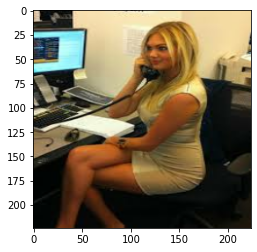

In [ ]:
# plot the image
import matplotlib.pyplot as plt
plt.imshow(img)

In [ ]:
# Getting the class name
import pathlib
import os
import numpy as np
data_dir = pathlib.Path("/content/drive/MyDrive/emirhan_human_dataset/datasets/human_data/train_data/") # turn our training path into a python path
class_name = np.array(sorted([item.name for item in data_dir.glob("*")])) 


print(class_name)

['calling' 'clapping' 'cycling' 'dancing' 'drinking' 'eating' 'fighting'
 'hugging' 'laughing' 'listening_to_music' 'running' 'sitting' 'sleeping'
 'texting' 'using_laptop']


In [ ]:
# Viewing random images from the dataset
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir , target_class):
  """
  This function returns random images
  """
  # setting up the target directory
  target_folder = target_dir + "/" + target_class

  # Getting a random image path
  random_image = random.sample(os.listdir(target_folder),1)

  # Readin the random image and view
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image Shape : {img.shape}")
  return img


Image Shape : (176, 287, 3)


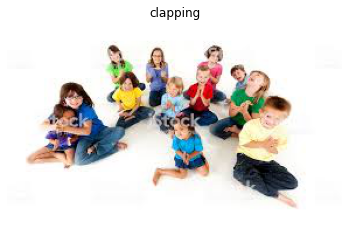

In [ ]:
img = view_random_image("/content/drive/MyDrive/emirhan_human_dataset/datasets/human_data/train_data","clapping")

In [ ]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
# Getting all the pixel values between 0 and 1
img/255

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [ ]:
img.shape

(176, 287, 3)

## Preparing the dataset



In [ ]:
train_dir = "/content/drive/MyDrive/emirhan_human_dataset/datasets/human_data/train_data"
test_dir = "/content/drive/MyDrive/emirhan_human_dataset/datasets/human_data/test_data"
sample_dir = "/content/drive/MyDrive/emirhan_human_dataset/sample_dataset"

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)
IMG_SIZE = (224,224)
BATCH_SIZE = 32

train_data = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                 image_size = IMG_SIZE,
                                                                 batch_size = BATCH_SIZE,
                                                                 label_mode = "categorical")

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                image_size = IMG_SIZE,
                                                                batch_size = BATCH_SIZE,
                                                                label_mode = "categorical",
                                                                shuffle = False)

sample_data = tf.keras.preprocessing.image_dataset_from_directory(directory = sample_dir,
                                                                  image_size = IMG_SIZE,
                                                                  batch_size = BATCH_SIZE,
                                                                  label_mode = "categorical")

Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 1440 files belonging to 15 classes.


In [ ]:
sample_data ,test_data

(<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 15), dtype=tf.float32, name=None))>,
 <BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 15), dtype=tf.float32, name=None))>)

In [ ]:
sample_data.class_names

['calling',
 'clapping',
 'cycling',
 'dancing',
 'drinking',
 'eating',
 'fighting',
 'hugging',
 'laughing',
 'listening_to_music',
 'running',
 'sitting',
 'sleeping',
 'texting',
 'using_laptop']

In [ ]:
# Getting our y labels from the test dataset
y_labels = []

for images , labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())

y_labels[500:520]


[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [ ]:
# Verifying an example of the batch of the data
for images , labels in sample_data.take(1):
  print(images , labels)

tf.Tensor(
[[[[254.       254.       254.      ]
   [254.       254.       254.      ]
   [254.       254.       254.      ]
   ...
   [253.       253.       253.      ]
   [253.       253.       253.      ]
   [253.       253.       253.      ]]

  [[254.       254.       254.      ]
   [254.       254.       254.      ]
   [254.       254.       254.      ]
   ...
   [253.       253.       253.      ]
   [253.       253.       253.      ]
   [253.       253.       253.      ]]

  [[254.       254.       254.      ]
   [254.       254.       254.      ]
   [254.       254.       254.      ]
   ...
   [253.       253.       253.      ]
   [253.       253.       253.      ]
   [253.       253.       253.      ]]

  ...

  [[250.       255.       250.      ]
   [250.86607  255.       250.      ]
   [253.33035  254.22322  251.55357 ]
   ...
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]]

  [[250.       255.       250.    

### Creating Callbacks

In [ ]:
# Creating tensorboard callback
import datetime

def create_tensorboard_callback(dir_name , experiment_name):
  """
  Creates a TensorBoard callback insance to store log files
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback



# Creating modeling checkpoint to save model's progression
checkpoint_path = "model_checkpoints/cp.ckpt"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor = "val_accuracy",
                                                      save_best_only = True,
                                                      save_weights_only = True,
                                                      verbose = 0)


# Creating Earlystopping callbacks 
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_loss",
                                                  patience = 3,
                                                  verbose = 1)

In [ ]:
def create_model_checkpoint(path):
  checkpoint_path = path + "/" + "cp.ckpt"
  return tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                            monitor = "val_accuracy",
                                            save_best_only = True,
                                            save_weights_only = True,
                                            verbose = 0)

## Setting up the mixed precision training

In [ ]:
# Turn on the mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16") # Setting up the global data policy to mixed precision 

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla T4, compute capability 7.5


In [ ]:
!nvidia-smi

Fri Aug  5 17:43:54 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    26W /  70W |    286MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
mixed_precision.global_policy()

<Policy "mixed_float16">

In [ ]:
# Preefetching the dataset
train_data = train_data.prefetch(tf.data.AUTOTUNE)
test_data = test_data.prefetch(tf.data.AUTOTUNE)
sample_data = sample_data.prefetch(tf.data.AUTOTUNE)

In [ ]:
train_data , test_data , sample_data

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 15), dtype=tf.float32, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 15), dtype=tf.float32, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 15), dtype=tf.float32, name=None))>)

## Building a feature extraction model

### Using Efficientnet 

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = layers.Input(shape = input_shape , dtype = tf.float16 , name = "input_layer")
x = base_model(inputs , training= False)
x = layers.GlobalAveragePooling2D(name = "average_pooling_layer")(x)
x = layers.Dense(len(class_name))(x)

# Adding an activation layer for mixed_precision as the output layers must of float32
outputs = layers.Activation("softmax",dtype = tf.float32 , name = "softmax_output_layer")(x)
model_1 = tf.keras.Model(inputs , outputs , name = "model_1")

In [ ]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 average_pooling_layer (Glob  (None, 1280)             0         
 alAveragePooling2D)                                             
                                                                 
 dense (Dense)               (None, 15)                19215     
                                                                 
 softmax_output_layer (Activ  (None, 15)               0         
 ation)                                                          
                                                                 
Total params: 4,068,786
Trainable params: 19,215
Non-traina

In [ ]:
# Compile the model
model_1.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
# Checking the dtype policy of the layers in the model
for layer in model_1.layers:
  print(layer.name , layer.trainable , layer.dtype , layer.dtype_policy)

input_layer True float16 <Policy "float16">
efficientnetb0 False float32 <Policy "mixed_float16">
average_pooling_layer True float32 <Policy "mixed_float16">
dense_1 True float32 <Policy "mixed_float16">
softmax_output_layer True float32 <Policy "float32">


In [ ]:
# Checking the base_model's layers dtype policy
for layer in model_1.layers[1].layers[:10]:
  print(layer.name , layer.trainable , layer.dtype , layer.dtype_policy)

input_2 False float32 <Policy "float32">
rescaling_1 False float32 <Policy "mixed_float16">
normalization_1 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">


In [ ]:
model_1.name

'model_1'

In [ ]:
# Fit the model
from helper_function import create_tensorboard_callback
history_model_1 = model_1.fit(sample_data,
                              epochs = 5,
                              steps_per_epoch = len(sample_data),
                              validation_data = test_data,
                              validation_steps = int(0.15*len(test_data)),
                              callbacks = [create_tensorboard_callback("training_logs",
                                                                       "model_1_feature_extraction"),
                                           create_model_checkpoint(model_1.name)])

Saving TensorBoard log files to: training_logs/model_1_feature_extraction/20220723-162842
Epoch 1/5
45/45 [==============================] - 559s 12s/step - loss: 2.1731 - accuracy: 0.3354 - val_loss: 1.7013 - val_accuracy: 0.4978
Epoch 2/5
45/45 [==============================] - 6s 124ms/step - loss: 1.3761 - accuracy: 0.6208 - val_loss: 1.3635 - val_accuracy: 0.5871
Epoch 3/5
45/45 [==============================] - 6s 128ms/step - loss: 1.1045 - accuracy: 0.6965 - val_loss: 1.2609 - val_accuracy: 0.6116
Epoch 4/5
45/45 [==============================] - 6s 121ms/step - loss: 0.9535 - accuracy: 0.7306 - val_loss: 1.1795 - val_accuracy: 0.6228
Epoch 5/5
45/45 [==============================] - 6s 134ms/step - loss: 0.8337 - accuracy: 0.7819 - val_loss: 1.1094 - val_accuracy: 0.6540


In [ ]:
# Evaluating on the test data
model_1_result = model_1.evaluate(test_data)
model_1_result

94/94 [==============================] - 668s 7s/step - loss: 1.1697 - accuracy: 0.6293


[1.1696645021438599, 0.6293333172798157]

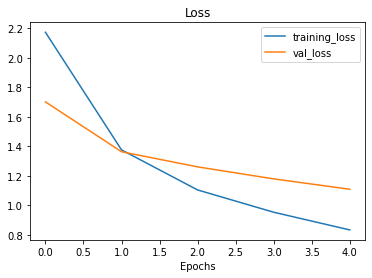

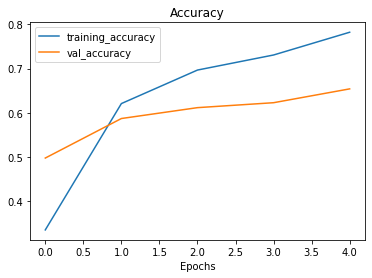

In [ ]:
from helper_function import plot_loss_curves
plot_loss_curves(history_model_1)

In [ ]:
len(test_data)

94

In [ ]:
checkpoint_path

'model_checkpoints/cp.ckpt'

In [ ]:
cloned_model = tf.keras.models.clone_model(model_1)
cloned_model.load_weights(model_1.name + "/cp.ckpt")

In [ ]:
cloned_model.compile(loss = "categorical_crossentropy",
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics = ["accuracy"])

cloned_model_1_results = cloned_model.evaluate(test_data)
cloned_model_1_results

94/94 [==============================] - 11s 74ms/step - loss: 1.5647 - accuracy: 0.5017


[1.564662218093872, 0.5016666650772095]

In [ ]:
# # Loaded checkpoint weights should return very similar results to checkpoint weights prior to saving
# import numpy as np
# assert np.isclose(model_1_result, cloned_model_1_results).all() # check if all elements in array are close

In [ ]:
# # Saving the model in google drive
# # Create directory path 
# import os
# save_dir = "/content/drive/MyDrive/emirhan_human_dataset/feature_extraction_efficientnet/"
# os.makedirs(save_dir) # To make directory if it doesn't exist

# # Save the model
# model_1.save(save_dir)


In [ ]:
# load saved model
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/emirhan_human_dataset/feature_extraction_efficientnet/")
loaded_model_result = loaded_model.evaluate(test_data)

94/94 [==============================] - 9s 75ms/step - loss: 1.1274 - accuracy: 0.6347


In [ ]:
loaded_model_result

[1.1274138689041138, 0.6346666812896729]

### Using Resnet

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
input_shape = (224,224,3)
base_model = tf.keras.applications.ResNet50(include_top = False)
base_model.trainable = False
inputs = layers.Input(shape = input_shape , dtype = tf.float16 , name = "input_layer")
x = base_model(inputs , training = False)
x = preprocessing.Rescaling(1.0/255)(x)
x = layers.GlobalMaxPooling2D(name = "global_avg_pooling_layer")(x)
x = layers.Dense(len(class_name))(x)
outputs = layers.Activation("softmax" , dtype = tf.float32 , name = "sotfmax_output_layer")(x)
model_2 = tf.keras.Model(inputs,outputs , name = "model_2")

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 rescaling_1 (Rescaling)     (None, 7, 7, 2048)        0         
                                                                 
 global_avg_pooling_layer (G  (None, 2048)             0         
 lobalMaxPooling2D)                                              
                                                                 
 dense_1 (Dense)             (None, 15)                30735     
                                                                 
 sotfmax_output_layer (Activ  (None, 15)               0         
 ation)                                                    

In [ ]:
# Compile the model
model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
# Checking the model dtype policy
for layer in model_2.layers:
  print(layer.name , layer.trainable , layer.dtype , layer.dtype_policy)

input_layer True float16 <Policy "float16">
resnet50 False float32 <Policy "mixed_float16">
rescaling_1 True float32 <Policy "mixed_float16">
global_avg_pooling_layer True float32 <Policy "mixed_float16">
dense_1 True float32 <Policy "mixed_float16">
sotfmax_output_layer True float32 <Policy "float32">


In [ ]:
# Checking the base model dtype policy
for layer in model_2.layers[1].layers[:10]:
  print(layer.name , layer.trainable , layer.dtype , layer.dtype_policy)

input_2 False float32 <Policy "float32">
conv1_pad False float32 <Policy "mixed_float16">
conv1_conv False float32 <Policy "mixed_float16">
conv1_bn False float32 <Policy "mixed_float16">
conv1_relu False float32 <Policy "mixed_float16">
pool1_pad False float32 <Policy "mixed_float16">
pool1_pool False float32 <Policy "mixed_float16">
conv2_block1_1_conv False float32 <Policy "mixed_float16">
conv2_block1_1_bn False float32 <Policy "mixed_float16">
conv2_block1_1_relu False float32 <Policy "mixed_float16">


In [ ]:
checkpoint_path

'model_checkpoints/cp.ckpt'

In [ ]:
# Fit the model
history_model_2 = model_2.fit(sample_data,
                              epochs = 5,
                              steps_per_epoch = len(sample_data),
                              validation_data = test_data,
                              validation_steps = int(0.15*len(test_data)),
                              callbacks = [create_tensorboard_callback("training_logs",
                                                                       "model_2_feature_extraction"),
                                           create_model_checkpoint(model_2.name)])

Saving TensorBoard log files to: training_logs/model_2_feature_extraction/20220723-052541
Epoch 1/5
45/45 [==============================] - 11s 156ms/step - loss: 2.6754 - accuracy: 0.0951 - val_loss: 2.6251 - val_accuracy: 0.3080
Epoch 2/5
45/45 [==============================] - 5s 112ms/step - loss: 2.5741 - accuracy: 0.4208 - val_loss: 2.5459 - val_accuracy: 0.4085
Epoch 3/5
45/45 [==============================] - 5s 113ms/step - loss: 2.4850 - accuracy: 0.5174 - val_loss: 2.4690 - val_accuracy: 0.4464
Epoch 4/5
45/45 [==============================] - 5s 112ms/step - loss: 2.4032 - accuracy: 0.5299 - val_loss: 2.4048 - val_accuracy: 0.4688
Epoch 5/5
45/45 [==============================] - 6s 135ms/step - loss: 2.3257 - accuracy: 0.5632 - val_loss: 2.3497 - val_accuracy: 0.4754


In [ ]:
model_2_results = model_2.evaluate(test_data)
model_2_results

94/94 [==============================] - 8s 75ms/step - loss: 2.3440 - accuracy: 0.4803


[2.3439533710479736, 0.4803333282470703]

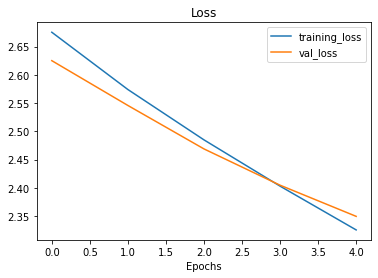

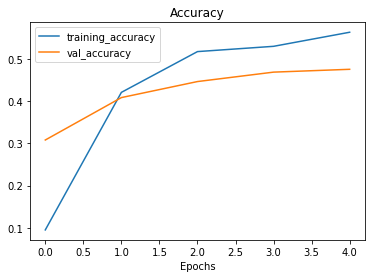

In [ ]:
plot_loss_curves(history_model_2)

In [ ]:
cloned_model_2 = tf.keras.models.clone_model(model_2)
cloned_model_2.load_weights("model_2/cp.ckpt")

In [ ]:
cloned_model_2.compile(loss = "categorical_crossentropy",
                       optimizer = tf.keras.optimizers.Adam(),
                       metrics = ["accuracy"])
cloned_model_2.evaluate(test_data)

94/94 [==============================] - 9s 73ms/step - loss: 2.3440 - accuracy: 0.4803


[2.3439528942108154, 0.4803333282470703]

### Using a Convolutional Neural Network

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPool2D , Flatten , Dense , AveragePooling2D

# Building a model
model_3 = Sequential([
                      Conv2D(15 , kernel_size = 3 , activation = "relu" , input_shape = (224,224,3)),
                      Conv2D(15,3 , activation = "relu"),
                      AveragePooling2D(),
                      Conv2D(15,3,activation = "relu"),
                      Conv2D(15,3,activation = "relu"),
                      AveragePooling2D(),
                      Conv2D(15,3,activation = "relu"),
                      Conv2D(15,3,activation = "relu"),
                      AveragePooling2D(),
                      Flatten(),
                      Dense(15 , activation = "softmax")
])

# COmpile the model
model_3.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
# Get the summary
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 15)      420       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 15)      2040      
                                                                 
 average_pooling2d (AverageP  (None, 110, 110, 15)     0         
 ooling2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 15)      2040      
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 15)      2040      
                                                                 
 average_pooling2d_1 (Averag  (None, 53, 53, 15)       0         
 ePooling2D)                                            

In [ ]:
# Fit the model
history_model_3 = model_3.fit(sample_data,
                              epochs = 5,
                              steps_per_epoch = len(sample_data),
                              validation_data = test_data,
                              validation_steps = int(0.15*len(test_data)),
                              verbose = 1)

Epoch 1/5
45/45 [==============================] - 8s 117ms/step - loss: 4.1159 - accuracy: 0.0639 - val_loss: 2.7088 - val_accuracy: 0.0714
Epoch 2/5
45/45 [==============================] - 6s 114ms/step - loss: 2.6245 - accuracy: 0.1285 - val_loss: 2.6410 - val_accuracy: 0.1161
Epoch 3/5
45/45 [==============================] - 6s 113ms/step - loss: 2.3321 - accuracy: 0.2535 - val_loss: 3.0820 - val_accuracy: 0.1049
Epoch 4/5
45/45 [==============================] - 6s 113ms/step - loss: 1.7457 - accuracy: 0.4444 - val_loss: 3.3551 - val_accuracy: 0.1138
Epoch 5/5
45/45 [==============================] - 6s 113ms/step - loss: 1.0345 - accuracy: 0.6722 - val_loss: 4.6236 - val_accuracy: 0.1049


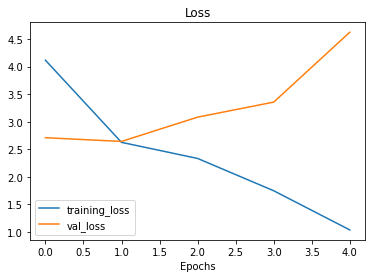

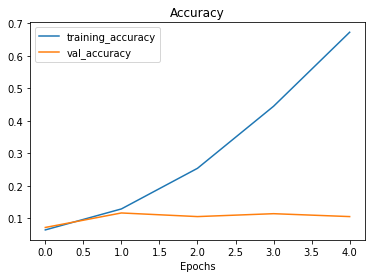

In [ ]:
plot_loss_curves(history_model_3)

### Using Data Augmetation

In [ ]:
# Create augmented data generator instance
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen_augmented = ImageDataGenerator(rescale = 1./255,
                                             rotation_range = 20,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             zoom_range = 0.2,
                                             horizontal_flip = True)

sample_data_aug = datagen_augmented.flow_from_directory(sample_dir,
                                                        target_size = (224,224),
                                                        batch_size = 32,
                                                        class_mode = "categorical")

Found 1440 images belonging to 15 classes.


In [ ]:
sample_data_aug

In [ ]:
# Refit the model with augmented data 
history_model_3_aug = model_3.fit(sample_data_aug,
                                  epochs = 5,
                                  steps_per_epoch = len(sample_data),
                                  validation_data = test_data,
                                  validation_steps = int(0.15*len(test_data)),
                                  verbose = 1)

Epoch 1/5
45/45 [==============================] - 22s 485ms/step - loss: 2.7004 - accuracy: 0.0701 - val_loss: 5.1616 - val_accuracy: 0.0781
Epoch 2/5
45/45 [==============================] - 21s 455ms/step - loss: 2.6873 - accuracy: 0.0951 - val_loss: 7.4621 - val_accuracy: 0.0893
Epoch 3/5
45/45 [==============================] - 21s 455ms/step - loss: 2.6523 - accuracy: 0.1194 - val_loss: 12.4844 - val_accuracy: 0.0558
Epoch 4/5
45/45 [==============================] - 20s 453ms/step - loss: 2.6337 - accuracy: 0.1174 - val_loss: 12.9425 - val_accuracy: 0.0737
Epoch 5/5
45/45 [==============================] - 22s 483ms/step - loss: 2.6423 - accuracy: 0.1049 - val_loss: 9.8613 - val_accuracy: 0.0804


In [ ]:
model_3.evaluate(test_data)

94/94 [==============================] - 7s 67ms/step - loss: 10.6680 - accuracy: 0.0937


[10.668041229248047, 0.09366666525602341]

### Using Efficientnet_V2

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetV2B0(include_top = False)
base_model.trainable = False

inputs = layers.Input(shape = input_shape , dtype = tf.float16 , name = "input_layer")
x = base_model(inputs , training = False)
x = layers.GlobalAveragePooling2D(name = "global_avg_pooling_layer")(x)
x = layers.Dense(len(class_name))(x)
outputs = layers.Activation("softmax",dtype = tf.float32 , name = "softmax_output_layer")(x)
model_4 = tf.keras.Model(inputs , outputs, name = "model_4")

# Compile the model
model_4.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
# Get the summary
model_4.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 global_avg_pooling_layer (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_9 (Dense)             (None, 15)                19215     
                                                                 
 softmax_output_layer (Activ  (None, 15)               0         
 ation)                                                          
                                                           

In [ ]:
# Checking the misxed_precision ploicy
for layer in model_4.layers:
  print(layer.name , layer.trainable , layer.dtype , layer.dtype_policy)

input_layer True float16 <Policy "float16">
efficientnetv2-b0 False float32 <Policy "mixed_float16">
global_avg_pooling_layer True float32 <Policy "mixed_float16">
dense_9 True float32 <Policy "mixed_float16">
softmax_output_layer True float32 <Policy "float32">


In [ ]:
# Checking the mixed_precision policy of the base model
for layer in model_4.layers[1].layers[:10]:
  print(layer.name , layer.trainable , layer.dtype , layer.dtype_policy)

input_9 False float32 <Policy "float32">
rescaling_8 False float32 <Policy "mixed_float16">
normalization_7 False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block1a_project_activation False float32 <Policy "mixed_float16">
block2a_expand_conv False float32 <Policy "mixed_float16">


In [ ]:
initial_epoch = 5

In [ ]:
# Fit the model
history_model_4 = model_4.fit(sample_data,
                              epochs = initial_epoch,
                              steps_per_epoch = len(sample_data),
                              validation_data = test_data,
                              validation_steps = int(0.15*len(test_data)),
                              verbose = 1,
                              callbacks = [create_tensorboard_callback("training_logs",
                                                                       "model_4_feature_extraction"),
                                           create_model_checkpoint(model_4.name)])

Saving TensorBoard log files to: training_logs/model_4_feature_extraction/20220723-062312
Epoch 1/5
45/45 [==============================] - 14s 167ms/step - loss: 2.1445 - accuracy: 0.3653 - val_loss: 1.6523 - val_accuracy: 0.5223
Epoch 2/5
45/45 [==============================] - 5s 109ms/step - loss: 1.3384 - accuracy: 0.6368 - val_loss: 1.3439 - val_accuracy: 0.5826
Epoch 3/5
45/45 [==============================] - 5s 112ms/step - loss: 1.0698 - accuracy: 0.7056 - val_loss: 1.2224 - val_accuracy: 0.6027
Epoch 4/5
45/45 [==============================] - 6s 129ms/step - loss: 0.9144 - accuracy: 0.7569 - val_loss: 1.1871 - val_accuracy: 0.6138
Epoch 5/5
45/45 [==============================] - 8s 158ms/step - loss: 0.8103 - accuracy: 0.7868 - val_loss: 1.0863 - val_accuracy: 0.6272


In [ ]:
model_4_results = model_4.evaluate(test_data)
model_4_results

94/94 [==============================] - 9s 85ms/step - loss: 1.1308 - accuracy: 0.6423


[1.13081955909729, 0.6423333287239075]

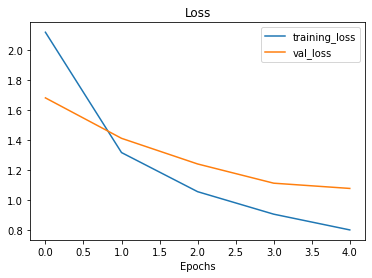

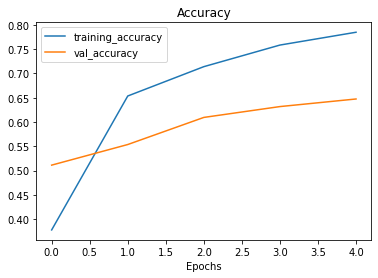

In [ ]:
plot_loss_curves(history_model_4)

In [ ]:
np.isclose(model_1_result , model_4_results)

array([False, False])

In [ ]:
# import os
# save_dir = "/content/drive/MyDrive/emirhan_human_dataset/feature_extraction_efficientnet_V2/"
# os.makedirs(save_dir) # To make directory if it doesn't exist

# # Save the model
# model_4.save(save_dir)


### Creating an data augmentation layer imbedded model

In [ ]:
# Creating a functional model with data augmentation layer
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential


# building a data augmentation layer
data_augmentation = Sequential([
                                preprocessing.RandomFlip('horizontal'),
                                preprocessing.RandomHeight(0.2),
                                preprocessing.RandomWidth(0.2),
                                preprocessing.RandomZoom(0.2),
                                preprocessing.RandomRotation(0.2)
],name = "data_augmentation_layer")

input_shape = (224,224,3)

# Creating a frozen base model
base_model_data_aug = tf.keras.applications.EfficientNetV2B0(include_top = False)
base_model_data_aug.trainable = False

# Creating input and output layer
inputs = layers.Input(shape = input_shape ,dtype = tf.float16, name = "input_layer")
x = data_augmentation(inputs)
x = base_model_data_aug(x,training = False)
x = layers.GlobalAveragePooling2D(name = "global_avg_pool_layer")(x)
x = layers.Dense(len(class_name))(x)
outputs = layers.Activation("softmax",dtype = tf.float32 , name = "softmax_output_layer")(x)
model_5 = tf.keras.Model(inputs , outputs)


In [ ]:
# compile the model
model_5.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
# fit the model
history_model_5 = model_5.fit(sample_data,
                              epochs = initial_epoch,
                              steps_per_epoch = len(sample_data),
                              validation_data = test_data,
                              validation_steps = int(0.15*len(test_data)),
                              verbose = 1,
                              callbacks = [create_tensorboard_callback("training_logs",
                                                                       "model_5_feature_extraction_data-aug"),
                                           create_model_checkpoint("model_5_augmented_data")])

Saving TensorBoard log files to: training_logs/model_5_feature_extraction_data-aug/20220723-061757
Epoch 1/5
45/45 [==============================] - 17s 170ms/step - loss: 2.3567 - accuracy: 0.2681 - val_loss: 1.8901 - val_accuracy: 0.4643
Epoch 2/5
45/45 [==============================] - 7s 148ms/step - loss: 1.8310 - accuracy: 0.4521 - val_loss: 1.5408 - val_accuracy: 0.5357
Epoch 3/5
45/45 [==============================] - 6s 132ms/step - loss: 1.5931 - accuracy: 0.5125 - val_loss: 1.3665 - val_accuracy: 0.5737
Epoch 4/5
45/45 [==============================] - 6s 125ms/step - loss: 1.4538 - accuracy: 0.5465 - val_loss: 1.3333 - val_accuracy: 0.5714
Epoch 5/5
45/45 [==============================] - 6s 131ms/step - loss: 1.3845 - accuracy: 0.5819 - val_loss: 1.2651 - val_accuracy: 0.5893


In [ ]:
model_5.evaluate(test_data)

94/94 [==============================] - 8s 75ms/step - loss: 1.3035 - accuracy: 0.5860


[1.303468942642212, 0.5860000252723694]

Hmmm...
Our model didn't perforemed well with data augmentation layer

let's try augmentated sample data instead of layer

In [ ]:
# Fitting the efficientnet_v2 model_4 with data augmentation sample
history_model_4_aug = model_4.fit(sample_data_aug,
                                  epochs = initial_epoch , 
                                  steps_per_epoch = len(sample_data_aug),
                                  validation_data = test_data,
                                  validation_steps = int(0.15*len(test_data)),
                                  verbose = 1,
                                  callbacks = [create_tensorboard_callback("training_logs",
                                                                           "model_4_feauture_extraction_aug"),
                                               create_model_checkpoint("model_4_augmented_data")])

Saving TensorBoard log files to: training_logs/model_4_feauture_extraction_aug/20220723-054616
Epoch 1/5
45/45 [==============================] - 21s 466ms/step - loss: 2.7298 - accuracy: 0.0729 - val_loss: 1.1187 - val_accuracy: 0.6339
Epoch 2/5
45/45 [==============================] - 26s 589ms/step - loss: 2.7372 - accuracy: 0.0590 - val_loss: 1.1281 - val_accuracy: 0.6317
Epoch 3/5
45/45 [==============================] - 20s 455ms/step - loss: 2.7289 - accuracy: 0.0646 - val_loss: 1.1454 - val_accuracy: 0.6317
Epoch 4/5
45/45 [==============================] - 21s 475ms/step - loss: 2.7300 - accuracy: 0.0667 - val_loss: 1.1603 - val_accuracy: 0.6183
Epoch 5/5
45/45 [==============================] - 20s 455ms/step - loss: 2.7329 - accuracy: 0.0611 - val_loss: 1.1193 - val_accuracy: 0.6406


Having a longer training time with improve in accuracy with just 0.02 is not worth it!!!!!

## Fine Tuning the EfficientNet_V2

In [ ]:
model_1.layers

In [ ]:
for layer in model_1.layers:
  print(layer.trainable)

True
False
True
True
True


In [ ]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 average_pooling_layer (Glob  (None, 1280)             0         
 alAveragePooling2D)                                             
                                                                 
 dense (Dense)               (None, 15)                19215     
                                                                 
 softmax_output_layer (Activ  (None, 15)               0         
 ation)                                                          
                                                                 
Total params: 4,068,786
Trainable params: 19,215
Non-traina

In [ ]:
model_1.layers[1].trainable_variables

[]

In [ ]:
base_model.trainable_variables

[]

In [ ]:
for i , layer in enumerate(base_model.layers):
  print(i , layer.name , layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [ ]:
# Changing the trainable parameter of the model
base_model.trainable = True

# Freezing all the layers except for the last 10
for layer in base_model.layers[:-20]:
  layer.trainable = False

# recompile the model
model_1.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                metrics =["accuracy"])

In [ ]:
# Checking which layers are tunable
for i , layer in enumerate(base_model.layers):
  print(i,layer.name , layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [ ]:
print(len(model_1.trainable_variables))

21


In [ ]:
# Fine tune for another 5 epcohs
fine_tune_epoch = initial_epoch + 5

In [ ]:
# Refit the model
history_model_1_fine_tune = model_1.fit(sample_data,
                                        epochs = fine_tune_epoch,
                                        steps_per_epoch = len(sample_data),
                                        initial_epoch = history_model_1.epoch[-1],
                                        validation_data = test_data,
                                        validation_steps = int(0.15*len(test_data)),
                                        verbose = 1,
                                        callbacks = [create_tensorboard_callback("training_logs",
                                                                                 "model_4_fine_tune"),
                                                     create_model_checkpoint("model_4_fine_tune")])

Saving TensorBoard log files to: training_logs/model_4_fine_tune/20220723-165058
Epoch 5/10
45/45 [==============================] - 14s 141ms/step - loss: 0.6908 - accuracy: 0.8090 - val_loss: 1.1092 - val_accuracy: 0.6295
Epoch 6/10
45/45 [==============================] - 5s 113ms/step - loss: 0.4820 - accuracy: 0.8715 - val_loss: 1.0011 - val_accuracy: 0.6853
Epoch 7/10
45/45 [==============================] - 5s 108ms/step - loss: 0.3445 - accuracy: 0.9222 - val_loss: 1.1161 - val_accuracy: 0.6674
Epoch 8/10
45/45 [==============================] - 6s 131ms/step - loss: 0.2436 - accuracy: 0.9514 - val_loss: 1.1207 - val_accuracy: 0.6652
Epoch 9/10
45/45 [==============================] - 6s 132ms/step - loss: 0.1648 - accuracy: 0.9729 - val_loss: 1.1603 - val_accuracy: 0.6652
Epoch 10/10
45/45 [==============================] - 6s 131ms/step - loss: 0.1035 - accuracy: 0.9903 - val_loss: 1.1893 - val_accuracy: 0.6696


In [ ]:
model_1.evaluate(test_data)

94/94 [==============================] - 8s 77ms/step - loss: 1.2256 - accuracy: 0.6500


[1.225550651550293, 0.6499999761581421]

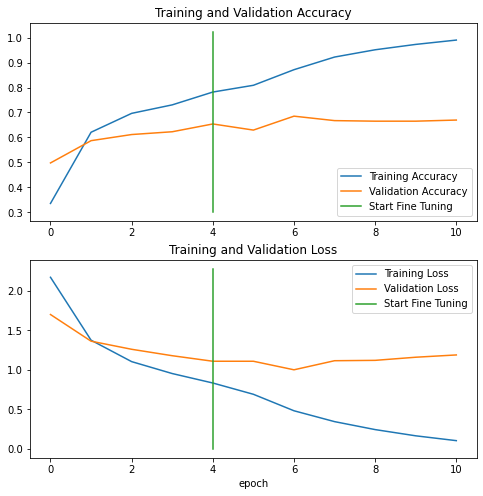

In [ ]:
from helper_function import compare_historys
compare_historys(history_model_1,
                 history_model_1_fine_tune,
                 initial_epochs = 5)

As we can see our model seems to overfit

## Training on our full data

It seems our first model performs the best

In [ ]:
# Training the feature extraction model on the full data set
history_model_1_full_data = model_1.fit(train_data,
                                        epochs = 5,
                                        steps_per_epoch = len(train_data),
                                        validation_data = test_data,
                                        validation_steps = int(0.15*len(test_data)),
                                        verbose = 1,
                                        callbacks = [create_tensorboard_callback("training_logs",
                                                                                 "model_1_full_data"),
                                                     create_model_checkpoint("model_1_full_Data"),
                                                     early_stopping])

In [ ]:
# evaluate on test data set
model_1.evaluate(test_data)

In [ ]:
for layer in model_1.layers:
  print(layer.trainable)

In [ ]:
plot_loss_curves(history_model_1_full_data)

In [ ]:
# model_1.save("/content/drive/MyDrive/emirhan_human_dataset/efficientnet_full_data")

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/emirhan_human_dataset/efficientnet_full_data")

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla T4, compute capability 7.5


In [ ]:
94*32

3008

## Evaluating the model

In [ ]:
model.evaluate(test_data)

94/94 [==============================] - 19s 80ms/step - loss: 0.8632 - accuracy: 0.7270


[0.8632356524467468, 0.7269999980926514]

In [ ]:
class_name

array(['calling', 'clapping', 'cycling', 'dancing', 'drinking', 'eating',
       'fighting', 'hugging', 'laughing', 'listening_to_music', 'running',
       'sitting', 'sleeping', 'texting', 'using_laptop'], dtype='<U18')

In [ ]:
pred_probs = model.predict(test_data,verbose = 1)
y_preds = pred_probs.argmax(axis = 1)

94/94 [==============================] - 8s 76ms/step


In [ ]:
y_preds[:10]

array([ 0,  9, 14,  0,  0,  0,  0,  0,  8,  0])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acc =accuracy_score(y_preds , y_labels)

In [ ]:
acc

0.727

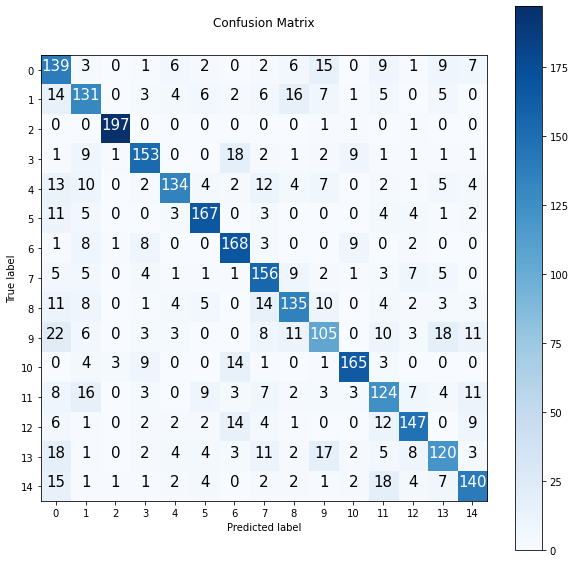

In [ ]:
from helper_function import make_confusion_matrix
make_confusion_matrix(y_labels,y_preds)

### Visualizing the models predictions 

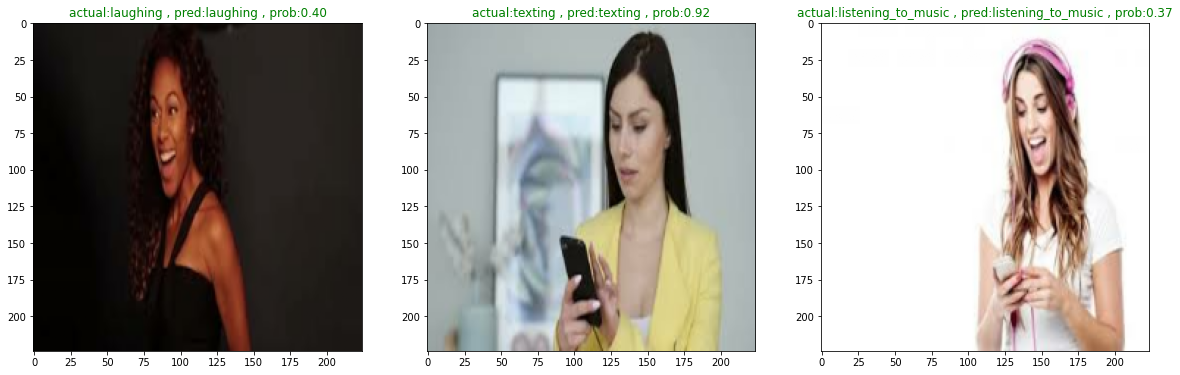

In [ ]:
from helper_function import load_and_prep_image
import os
import random
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))
for i in range(3):
  c_name = random.choice(class_name)
  file_name = random.choice(os.listdir(test_dir + "/" + c_name))
  file_path = test_dir +"/" + c_name + "/" + file_name

  # Loading the image and making predictions
  img = load_and_prep_image(file_path , scale = False)
  pred_prob = model.predict(tf.expand_dims(img,axis = 0))
  pred_class = class_name[pred_prob.argmax()]

  # Plot the image
  plt.subplot(1,3,i+1)
  plt.imshow(img/255.)
  if c_name == pred_class:
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual:{c_name} , pred:{pred_class} , prob:{pred_prob.max():.2f}",c=title_color)

## Getting the most wrong prediction

In [ ]:
# Getting the filenames of the test data
filepaths = []
for filepath in test_data.list_files("/content/drive/MyDrive/emirhan_human_dataset/datasets/human_data/test_data/*/*.jpg",
                                     shuffle = False):
  filepaths.append(filepath.numpy())
filepaths[:10]

[b'/content/drive/MyDrive/emirhan_human_dataset/datasets/human_data/test_data/calling/images_006 (3).jpg',
 b'/content/drive/MyDrive/emirhan_human_dataset/datasets/human_data/test_data/calling/images_006.jpg',
 b'/content/drive/MyDrive/emirhan_human_dataset/datasets/human_data/test_data/calling/images_007 (2).jpg',
 b'/content/drive/MyDrive/emirhan_human_dataset/datasets/human_data/test_data/calling/images_007.jpg',
 b'/content/drive/MyDrive/emirhan_human_dataset/datasets/human_data/test_data/calling/images_008 (2).jpg',
 b'/content/drive/MyDrive/emirhan_human_dataset/datasets/human_data/test_data/calling/images_008.jpg',
 b'/content/drive/MyDrive/emirhan_human_dataset/datasets/human_data/test_data/calling/images_009 - Copy.jpg',
 b'/content/drive/MyDrive/emirhan_human_dataset/datasets/human_data/test_data/calling/images_009.jpg',
 b'/content/drive/MyDrive/emirhan_human_dataset/datasets/human_data/test_data/calling/images_010 (2).jpg',
 b'/content/drive/MyDrive/emirhan_human_dataset/da

In [ ]:
# Creating the dataframe
import pandas as pd
pred_df = pd.DataFrame({"img_path":filepaths,
                        "y_true":y_labels,
                        "y_preds":y_preds,
                        "pred_conf":pred_probs.max(axis = 1),
                        "y_true_name":[class_name[i] for i in y_labels],
                        "y_pred_classname":[class_name[i] for i in y_preds]})
pred_df.head()

,img_path,y_true,y_preds,pred_conf,y_true_name,y_pred_classname
0,b'/content/drive/MyDrive/emirhan_human_dataset...,0,0,0.687304,calling,calling
1,b'/content/drive/MyDrive/emirhan_human_dataset...,0,9,0.649234,calling,listening_to_music
2,b'/content/drive/MyDrive/emirhan_human_dataset...,0,14,0.610387,calling,using_laptop
3,b'/content/drive/MyDrive/emirhan_human_dataset...,0,0,0.448307,calling,calling
4,b'/content/drive/MyDrive/emirhan_human_dataset...,0,0,0.818256,calling,calling


In [ ]:
class_name

array(['calling', 'clapping', 'cycling', 'dancing', 'drinking', 'eating',
       'fighting', 'hugging', 'laughing', 'listening_to_music', 'running',
       'sitting', 'sleeping', 'texting', 'using_laptop'], dtype='<U18')

In [ ]:
pred_df["correct_prediction"] = pred_df["y_true"]==pred_df["y_preds"]
pred_df.head(10)

,img_path,y_true,y_preds,pred_conf,y_true_name,y_pred_classname,correct_prediction
0,b'/content/drive/MyDrive/emirhan_human_dataset...,0,0,0.687304,calling,calling,True
1,b'/content/drive/MyDrive/emirhan_human_dataset...,0,9,0.649234,calling,listening_to_music,False
2,b'/content/drive/MyDrive/emirhan_human_dataset...,0,14,0.610387,calling,using_laptop,False
3,b'/content/drive/MyDrive/emirhan_human_dataset...,0,0,0.448307,calling,calling,True
4,b'/content/drive/MyDrive/emirhan_human_dataset...,0,0,0.818256,calling,calling,True
5,b'/content/drive/MyDrive/emirhan_human_dataset...,0,0,0.828096,calling,calling,True
6,b'/content/drive/MyDrive/emirhan_human_dataset...,0,0,0.893154,calling,calling,True
7,b'/content/drive/MyDrive/emirhan_human_dataset...,0,0,0.386547,calling,calling,True
8,b'/content/drive/MyDrive/emirhan_human_dataset...,0,8,0.566889,calling,laughing,False
9,b'/content/drive/MyDrive/emirhan_human_dataset...,0,0,0.604332,calling,calling,True


In [ ]:
# Getting the top 100 wrong predictions
top_100_wrong = pred_df[pred_df["correct_prediction"]==False].sort_values("pred_conf",ascending=False)[:100]

In [ ]:
top_100_wrong.head(20)

,img_path,y_true,y_preds,pred_conf,y_true_name,y_pred_classname,correct_prediction
1608,b'/content/drive/MyDrive/emirhan_human_dataset...,8,5,0.999602,laughing,eating,False
305,b'/content/drive/MyDrive/emirhan_human_dataset...,1,6,0.998513,clapping,fighting,False
2035,b'/content/drive/MyDrive/emirhan_human_dataset...,10,2,0.998343,running,cycling,False
1508,b'/content/drive/MyDrive/emirhan_human_dataset...,7,5,0.997768,hugging,eating,False
2720,b'/content/drive/MyDrive/emirhan_human_dataset...,13,0,0.992037,texting,calling,False
682,b'/content/drive/MyDrive/emirhan_human_dataset...,3,10,0.988695,dancing,running,False
2855,b'/content/drive/MyDrive/emirhan_human_dataset...,14,11,0.987483,using_laptop,sitting,False
1320,b'/content/drive/MyDrive/emirhan_human_dataset...,6,2,0.985690,fighting,cycling,False
1073,b'/content/drive/MyDrive/emirhan_human_dataset...,5,12,0.984764,eating,sleeping,False
900,b'/content/drive/MyDrive/emirhan_human_dataset...,4,9,0.979114,drinking,listening_to_music,False


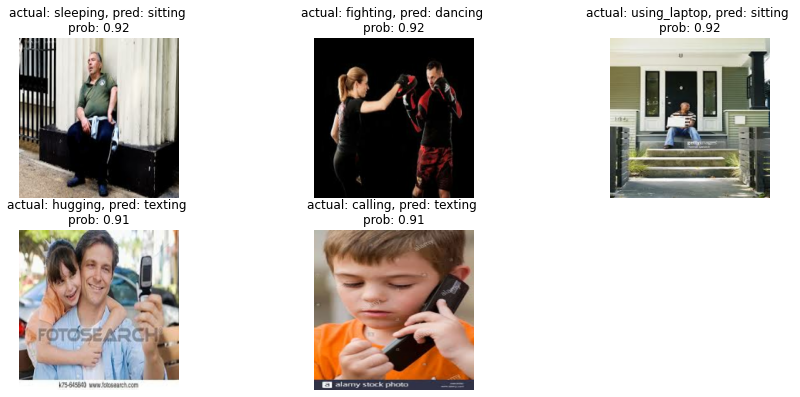

In [ ]:
# Visulazing the wrong predictions
num = 5
start_index = 25
plt.figure(figsize = (15,10))
for i , row in enumerate(top_100_wrong[start_index:start_index+num].itertuples()):
  plt.subplot(3,3,i+1)
  img = load_and_prep_image(row[1],scale = True)
  _,_,_,_,pred_prob,y_true,y_pred,_ = row
  plt.imshow(img)
  plt.title(f"actual: {y_true}, pred: {y_pred} \nprob: {pred_prob:.2f}")
  plt.axis(False)
